## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk


BISEZIONE:  -2.2737367544323206e-13 42 [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07, 4.76837158203125e-07, -2.384185791015625e-07, 1.1920928955078125e-07, -5.960464477539063e-08, 2.9802322387695312e-08, -1.4901161193847656e-08, 7.450580596923828e-09, -3.725290298461914e-09, 1.862645149230957e-09, -9.313225746154785e-10, 4.656612873077393e-10, -2.3283064365386963e-10, 1.1641532182693481e-10, -5.820766091346741e-11, 2.9103830456733704e-11, -1.4551915228366852e-11, 7.275957614183426e-12, -3.637978807091713e-12, 1.8189894035458565e-12, -9.094947017729282e-13, 4.547473508864641e-13, -2.2737367544323206e-13]
errore_bisezione [5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.9531

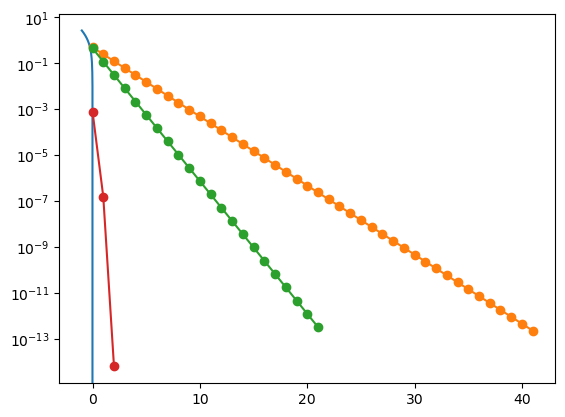

In [21]:
import numpy as np
from bisezione import bisezione
from falsi import falsi
from newton import newton
from derivata import derivata
import matplotlib.pyplot as plt
import sympy as sym

f = lambda x: np.exp(-x)-(x+1)
a = -1.0
b = 2.0
xx = np.linspace(a,b,200)
plt.plot(xx,f(xx))

#BISEZIONE
zero_b, it_bis, v_xk_b = bisezione(f,a,b,1e-12)
print("\nBISEZIONE: ",zero_b, it_bis, v_xk_b)
alfa = 0
err_bis = np.abs(np.array(v_xk_b)-alfa)
print("errore_bisezione", err_bis)
plt.semilogy(range(it_bis),err_bis,'-o')


#FALSI
zero_f, it_fals, v_xk_f = falsi(f,a,b,1e-12,1e-12,1000)
print("\nFALSI: ",zero_f, it_fals, v_xk_b)
alfa = 0
err_falsi = np.abs(np.array(v_xk_f)-alfa)
print("errore_falsi", err_falsi)
plt.semilogy(range(it_fals),err_falsi,'-o')


#NEWTON
x0 = 0.5
tolx = 1e-12
tolf = 1e-12
nmax = 500
#derivata
x = sym.symbols('x')
fs = sym.exp(-x)-(x+1)
fp = derivata(x,fs)

zero_newton, it_n, v_xk_n = newton(f,fp,x0,tolx,tolf,nmax)
print("\nNEWTON: ",zero_newton, it_n, v_xk_n)
err_newton = np.abs(np.array(v_xk_n)-alfa)
print("errore_newton", err_newton)
plt.semilogy(range(it_n),err_newton,'-o')

**Sperimentazione numerica**

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

Andamento degli errori sulle 3 funzioni tramite bisezione
Risultati bisezione: -2.2737367544323206e-13 1.0000000000002274 2.5198420997903668
-1 - exp(-x)
1/((x + 3)*log(2))
-x/2 + 1/(2*sqrt(x))
ERRORE NEWTOWN: [1.11102845e-03 3.08653167e-07 2.37917867e-14]
Andamento degli errori sulle 3 funzioni tramite newton
Risultati newton: -2.3791786736070093e-14 1.0000000000000002 2.5198420997897464


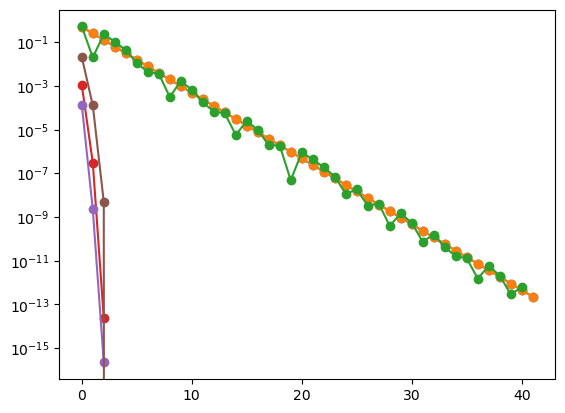

In [27]:
from bisezione import bisezione
from falsi import falsi
from newton import newton
from derivata import derivata
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

f1 = lambda x: np.exp(-x)-(x+1)
a1 = -1
b1 = 2
x01 = -0.5
tolx1 = 1e-12
tolf1 = 1e-12

f2 = lambda x: np.log2(x+3)-2
a2 = -1
b2 = 2
x02 = 0.5
tolx2 = 1e-12
tolf2 = 1e-12

f3 = lambda x: np.sqrt(x)-(x**2)/4
a3 = 1
b3 = 3
x03 = 1.8
tolx3 = 1e-12
tolf3 = 1e-12

#BISEZIONE
zero_b1, it_bis1, v_xk_b1 = bisezione(f1,a1,b1,tolx1)
zero_b2, it_bis2, v_xk_b2 = bisezione(f2,a2,b2,tolx2)
zero_b3, it_bis3, v_xk_b3 = bisezione(f3,a3,b3,tolx3)
alfa1 = 0
alfa2 = 1
alfa3 = 2**(4/3)
err_bis1 = np.abs(np.array(v_xk_b1)-alfa1)
err_bis2 = np.abs(np.array(v_xk_b2)-alfa2)
err_bis3 = np.abs(np.array(v_xk_b3)-alfa3)
print("Andamento degli errori sulle 3 funzioni tramite bisezione")
plt.semilogy(range(it_bis1),err_bis1,'-o')
plt.semilogy(range(it_bis2),err_bis2,'-o')
plt.semilogy(range(it_bis3),err_bis3,'-o')
print("Risultati bisezione:",zero_b1,zero_b2,zero_b3)

#NEWTON
#derivata
x = sym.symbols('x')
fs1 = sym.exp(-x)-(x+1)
fs2 = sym.log(x+3, 2)-2
fs3 = sym.sqrt(x)-(x**2)/4

fp1 = derivata(x,fs1)
fp2 = derivata(x,fs2)
fp3 = derivata(x,fs3)

nmax = 500
zero_n1, it_new1, v_xk_n1 = newton(f1,fp1,x01,tolx1,tolf1,nmax)
zero_n2, it_new2, v_xk_n2 = newton(f2,fp2,x02,tolx2,tolf2,nmax)
zero_n3, it_new3, v_xk_n3 = newton(f3,fp3,x03,tolx3,tolf3,nmax)
alfa1 = 0
alfa2 = 1
alfa3 = 2**(4/3)
err_new1 = np.abs(np.array(v_xk_n1)-alfa1)
print("ERRORE NEWTOWN:",err_new1)
err_new2 = np.abs(np.array(v_xk_n2)-alfa2)
err_new3 = np.abs(np.array(v_xk_n3)-alfa3)
print("Andamento degli errori sulle 3 funzioni tramite newton")
plt.semilogy(range(it_new1),err_new1,'-o')
plt.semilogy(range(it_new2),err_new2,'-o')
plt.semilogy(range(it_new3),err_new3,'-o')
print("Risultati newton:",zero_n1,zero_n2, zero_n3)


- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 

   2x0-cos(x1)=0

   sin(x0)+2x1=0

2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



In [5]:
F = lambda x: np.array([ 2*x[0]-np.cos(x[1]), np.sin(x[0])+2*x[1] ]) #sistema con f
#Costruisco lo Jacobiano di questo sistema
Jac = lambda x: np.array([[2,np.sin(x[1])],[np.cos(x[0]),2]]) #matrice Jacobbiana con dfxi/xi
x = np.array([1,2])
Jac(x)

array([[2.        , 0.90929743],
       [0.54030231, 2.        ]])

Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

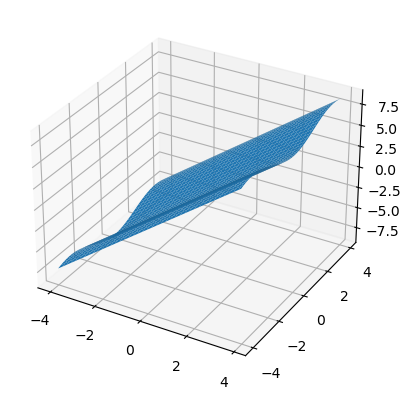

In [8]:
from mpl_toolkits.mplot3d import Axes3D
#discretizzo x e y
x = np.arange(-4.0,4.0,0.1)
y = np.arange(-4.0,4.0,0.1)
#Vorrei un metodo che mi discretizza tutti i punti dentro la griglia rappresentata e valutata nel piano 3D
X,Y = np.meshgrid(x,y)
Z1 = 2*X-np.cos(Y)
Z2 = np.sin(X)+2*Y
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1)
plt.show()

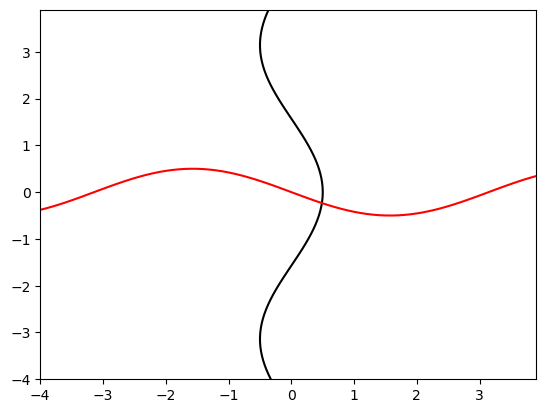

In [11]:
plt.contour(X,Y,Z1,levels=[0],colors='black')
plt.contour(X,Y,Z2,levels=[0],colors='red')
plt.show()